## Read the train, validation and test datasets

In [1]:
import numpy as np
import pandas as pd

train_      = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/train.csv')
validation_ = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/validation.csv')
test       = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/test.csv')

## Concatenate train and validation datasets

In [2]:
frames = [train_,validation_]
data = pd.concat(frames)

## Data preprocessing

In [3]:
Change_values = {'Gender':{'M':1, 'F':0},
                'Ethnicity':{'Latino':3,'African American':2,'Asian American':1, 'caucasian':0},
                'Educational_Level':{'Mid-School':0,'High-School':1,'College':2,'Grad':3},
                'Income':{'<25K':0,'25K --50K':1,'50K -- 100K':2,'>100K':3},
                'Country_region':{'North':3,'South':2,'East':1,'West':0},
                'Hotel_Type':{'City Hotel':2,'Airport Hotels':1,'Resort':0},
                'Meal_Type':{'BB':0,'HB':1,'FB':2},
                'Visted_Previously':{'Yes':1,'No':0},
                'Previous_Cancellations':{'Yes':1,'No':0},
                'Deposit_type':{'Refundable':2,'Non-Refundable':1, 'No Deposit':0},
                'Booking_channel':{'Direct':2,'Agent':1,'Online':0},
                'Required_Car_Parking':{'Yes':1,'No':0},
                'Reservation_Status':{'Check-In':2,'Canceled':1,'No-Show':0},
                'Use_Promotion':{'Yes':1,'No':0},
                }

data.replace(Change_values, inplace=True)
test.replace(Change_values, inplace=True)

data.pop('Expected_checkin')
data.pop('Expected_checkout')
data.pop('Booking_date')

test.pop('Expected_checkin')
test.pop('Expected_checkout')
test.pop('Booking_date')

index_d=data.pop('Reservation-id')
index_te=test.pop('Reservation-id')

## Data Cleaning

In [4]:
data.drop(data[data['Booked_before_checkin'] < 0].index, axis = 0, inplace = True)
data.drop(data[data['Booked_before_checkin'] > 365].index, axis = 0, inplace = True)
data.drop(data[data["Previous_Cancellations"] == 1].index, axis = 0, inplace = True)
data.drop(['Previous_Cancellations'], axis = 1, inplace = True)

test.drop(['Previous_Cancellations'], axis = 1, inplace = True)

label_d=data.pop('Reservation_Status')

## Oversampling for imbalanced Data

Class=2, n=19102 (33.333%)
Class=1, n=19102 (33.333%)
Class=0, n=19102 (33.333%)


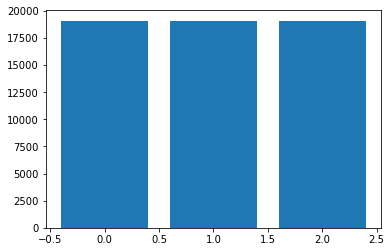

In [5]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

label_d = LabelEncoder().fit_transform(label_d)

oversample = SMOTE()
data,label_d = oversample.fit_resample(data, label_d)

counter = Counter(label_d)
for k,v in counter.items():
    per = v / len(label_d) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Split the data as train and validation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train, validation, label_t, label_v = train_test_split( data, label_d, test_size = 0.38,random_state=100)

## Describe the train data

In [10]:
train.describe()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_days_spend,Booked_before_checkin
count,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000,35529.000000
mean,0.362718,43.680402,1.308368,1.398407,1.088069,1.413578,0.810718,2.139717,1.580005,0.228067,0.679304,0.143967,0.444060,0.573081,0.597653,0.710490,12.127501,174.976245,1.642940,109.742492
std,0.480791,14.912120,1.023474,0.944049,0.935451,0.951464,0.752428,1.049421,0.649746,0.471699,0.723321,0.351061,0.735459,0.779878,0.490378,0.453541,10.783146,43.700604,0.853492,67.336940
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,137.000000,1.000000,52.000000
50%,0.000000,44.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,175.000000,1.000000,106.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,213.000000,2.000000,165.000000
max,1.000000,70.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,40.000000,250.000000,4.000000,365.000000


## Define functions for plots and prediction using xgboost model for multiclass classification

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['dval'][m]
        train_score = eval_results['dtrain'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model,epochs=1000):
    print('Fitting model...')
    sk_model.fit(train,label_t)
    print('Fitting done!')
    dtrain = xgb.DMatrix(train, label=label_t)
    dval = xgb.DMatrix(validation, label=label_v)
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(dval, 'dval'),(dtrain,'dtrain')]
    xgb_model = xgb.train(params, dtrain, epochs, evallist,evals_result=store,verbose_eval=100)
    
    print('-- Model Report --')
    print('XGBoost F1-Score (Macro): '+str(f1_score(sk_model.predict(validation),label_v,average='macro')))
    plot_compare(metrics,store,epochs)
    
    features = ['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously','Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Expected_days_spend',
       'Booked_before_checkin']
    
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

## Build xgboost model

In [8]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    seed=27)

## Run the function for prediction and calculate f1 score for validation dataset

Fitting model...
Fitting done!
[0]	dval-mlogloss:1.08474	dval-merror:0.517059	dtrain-mlogloss:1.08455	dtrain-merror:0.511554
[100]	dval-mlogloss:0.817365	dval-merror:0.364146	dtrain-mlogloss:0.785972	dtrain-merror:0.331307
[200]	dval-mlogloss:0.748593	dval-merror:0.314919	dtrain-mlogloss:0.685557	dtrain-merror:0.265248
[300]	dval-mlogloss:0.708491	dval-merror:0.289893	dtrain-mlogloss:0.615011	dtrain-merror:0.219849
[400]	dval-mlogloss:0.678992	dval-merror:0.273362	dtrain-mlogloss:0.560227	dtrain-merror:0.187565
[500]	dval-mlogloss:0.656815	dval-merror:0.261055	dtrain-mlogloss:0.515615	dtrain-merror:0.161868
[600]	dval-mlogloss:0.635556	dval-merror:0.251596	dtrain-mlogloss:0.475228	dtrain-merror:0.140983
[700]	dval-mlogloss:0.618847	dval-merror:0.242228	dtrain-mlogloss:0.439873	dtrain-merror:0.122069
[800]	dval-mlogloss:0.603961	dval-merror:0.232952	dtrain-mlogloss:0.408412	dtrain-merror:0.106054
[900]	dval-mlogloss:0.589864	dval-merror:0.226294	dtrain-mlogloss:0.379651	dtrain-merror:0.

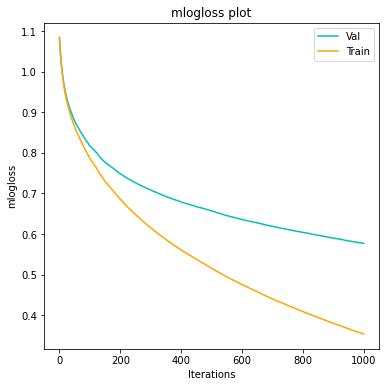

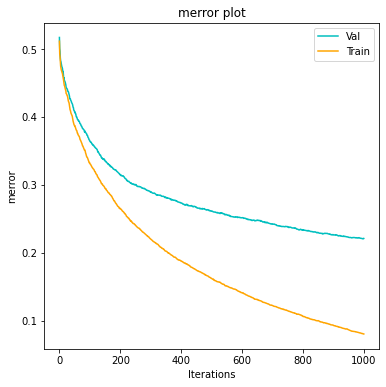

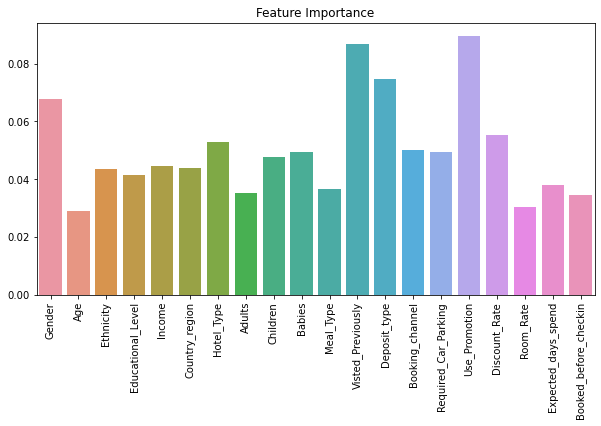

In [9]:
fitXgb(xgb1)

## Define function to get best parameters for xgboost model

In [12]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

## Fit our model using predefined parameters

In [13]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_macro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(train, label_t)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=1000, nthread=4, num_class=3,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='f1_macro', verbose=10)

## Get best parameters for xgboost model

In [14]:
getTrainScores(gsearch1)

({0: "mean:0.6506990867858674params{'max_depth': 3, 'min_child_weight': 1}",
  1: "mean:0.6498660989690086params{'max_depth': 3, 'min_child_weight': 3}",
  2: "mean:0.6520548957651289params{'max_depth': 3, 'min_child_weight': 5}",
  3: "mean:0.7648845764517875params{'max_depth': 5, 'min_child_weight': 1}",
  4: "mean:0.7635923882391541params{'max_depth': 5, 'min_child_weight': 3}",
  5: "mean:0.7623503141238775params{'max_depth': 5, 'min_child_weight': 5}",
  6: "mean:0.8279577299447055params{'max_depth': 7, 'min_child_weight': 1}",
  7: "mean:0.8229323994575086params{'max_depth': 7, 'min_child_weight': 3}",
  8: "mean:0.8199568480361126params{'max_depth': 7, 'min_child_weight': 5}",
  9: "mean:0.8450696975624206params{'max_depth': 9, 'min_child_weight': 1}",
  10: "mean:0.838758185780687params{'max_depth': 9, 'min_child_weight': 3}",
  11: "mean:0.8344578418998374params{'max_depth': 9, 'min_child_weight': 5}"},
 {'best_mean': 0.8450696975624206,
  'best_param': {'max_depth': 9, 'min_c

## Build and run xgboost model for prediction and calculate f1 score for validation dataset

Fitting model...
Fitting done!
[0]	dval-mlogloss:1.0777	dval-merror:0.476696	dtrain-mlogloss:1.07368	dtrain-merror:0.43556
[100]	dval-mlogloss:0.640171	dval-merror:0.230702	dtrain-mlogloss:0.444312	dtrain-merror:0.090743
[200]	dval-mlogloss:0.500948	dval-merror:0.174863	dtrain-mlogloss:0.221639	dtrain-merror:0.014354
[300]	dval-mlogloss:0.437118	dval-merror:0.156725	dtrain-mlogloss:0.120731	dtrain-merror:0.001604
[400]	dval-mlogloss:0.403156	dval-merror:0.147587	dtrain-mlogloss:0.070305	dtrain-merror:0.000113
[500]	dval-mlogloss:0.386069	dval-merror:0.142444	dtrain-mlogloss:0.044794	dtrain-merror:0
[600]	dval-mlogloss:0.376067	dval-merror:0.139597	dtrain-mlogloss:0.030321	dtrain-merror:0
[700]	dval-mlogloss:0.371847	dval-merror:0.136704	dtrain-mlogloss:0.022181	dtrain-merror:0
[800]	dval-mlogloss:0.370059	dval-merror:0.136107	dtrain-mlogloss:0.016969	dtrain-merror:0
[900]	dval-mlogloss:0.370183	dval-merror:0.134913	dtrain-mlogloss:0.013515	dtrain-merror:0
[999]	dval-mlogloss:0.371403	d

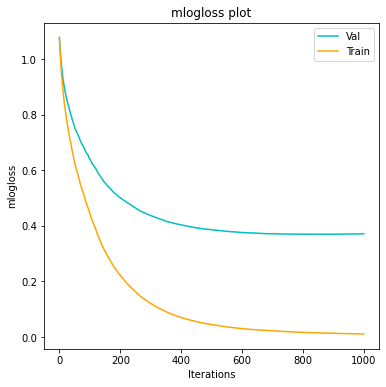

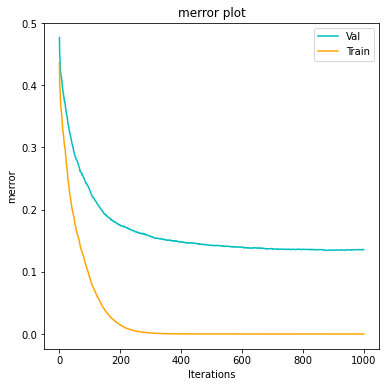

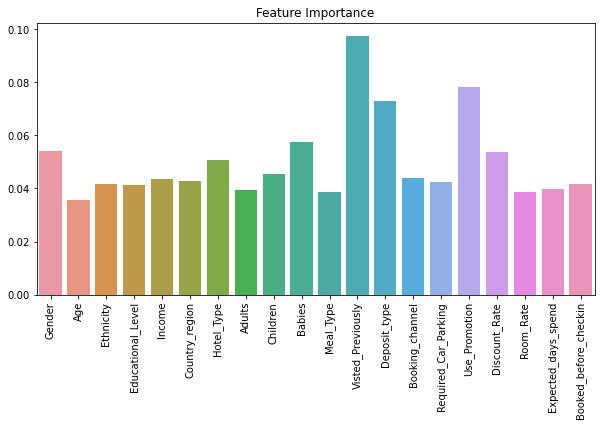

In [15]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    seed=27)

fitXgb(xgb2)

## Fit our model using predefined parameters 

In [16]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=3)
gsearch2.fit(train, label_t)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=9,
                                     n_estimators=1000, nthread=4, num_class=3,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=-1, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='f1_micro', verbose=10)

## Get best parameters for xgboost model

In [17]:
getTrainScores(gsearch2)

({0: "mean:0.8290973570885756params{'reg_alpha': 1e-05}",
  1: "mean:0.8285907287004982params{'reg_alpha': 0.01}",
  2: "mean:0.8296321314982128params{'reg_alpha': 0.1}",
  3: "mean:0.8229333783669679params{'reg_alpha': 1}",
  4: "mean:0.5863942131779672params{'reg_alpha': 100}"},
 {'best_mean': 0.8296321314982128, 'best_param': {'reg_alpha': 0.1}})

## Build and run xgboost model for prediction and calculate f1 score for validation dataset

Fitting model...
Fitting done!
[0]	dval-mlogloss:1.07778	dval-merror:0.480048	dtrain-mlogloss:1.07379	dtrain-merror:0.438431
[100]	dval-mlogloss:0.632186	dval-merror:0.222437	dtrain-mlogloss:0.437184	dtrain-merror:0.086521
[200]	dval-mlogloss:0.499127	dval-merror:0.172292	dtrain-mlogloss:0.221425	dtrain-merror:0.015058
[300]	dval-mlogloss:0.437791	dval-merror:0.153924	dtrain-mlogloss:0.123929	dtrain-merror:0.001773
[400]	dval-mlogloss:0.403274	dval-merror:0.145291	dtrain-mlogloss:0.072905	dtrain-merror:0.000113
[500]	dval-mlogloss:0.386329	dval-merror:0.141204	dtrain-mlogloss:0.047447	dtrain-merror:0
[600]	dval-mlogloss:0.376147	dval-merror:0.138127	dtrain-mlogloss:0.032525	dtrain-merror:0
[700]	dval-mlogloss:0.371455	dval-merror:0.135694	dtrain-mlogloss:0.023839	dtrain-merror:0
[800]	dval-mlogloss:0.369591	dval-merror:0.135234	dtrain-mlogloss:0.01841	dtrain-merror:0
[900]	dval-mlogloss:0.369261	dval-merror:0.1345	dtrain-mlogloss:0.014782	dtrain-merror:0
[999]	dval-mlogloss:0.369857	dv

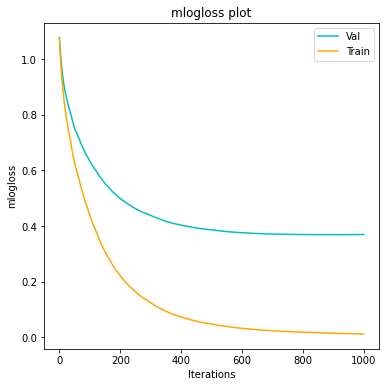

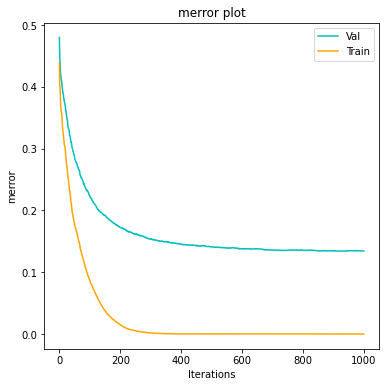

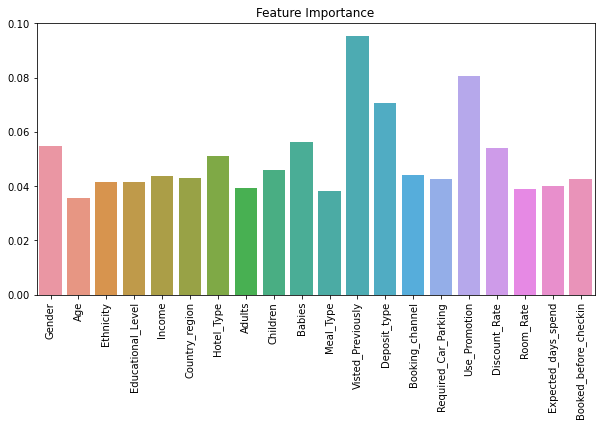

In [18]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    reg_alpha=0.1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    seed=27)

fitXgb(xgb3)

## Get predictions for test dataset

In [19]:
predict = xgb3.predict(test)

## Write predictions to csv

In [20]:
Reservation_Status=pd.DataFrame(predict,columns=['Reservation_Status'])
change_v = {'Reservation_Status':{2:1,1:2,0:3}}
Reservation_Status.replace(change_v, inplace=True)

submit = pd.read_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv')
submit=pd.concat([submit,Reservation_Status],axis=1)
export_csv=submit.to_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv',index=None)